In [1]:
from tqdm import tqdm, tqdm_notebook
import newspaper
from time import time
import pandas as pd
import numpy as np
import langdetect
import stop_words
import spacy

tqdm.pandas()
tqdm_notebook()


0/|/| 0/? [00:00<?, ?it/s]

In [2]:
import csv
import codecs
with codecs.open('data_scraping.csv', 'r', 'latin') as csvFile:
    data = csv.reader(csvFile, delimiter=',', quotechar='"')
    df_comments = pd.DataFrame([row for row in data if len(row)==2 and row[0]!='source'], columns=['source', 'text'])

In [3]:
df_comments.source.value_counts().reset_index()

index  source
0          bestbuy   13281
1          youtube    8820
2           reddit    8441
3        gsm arena    5799
4          twitter    5016
5           amazon     842
6         flipkart     436
7             at&t     424
8      influenster     273
9  google shopping     156

In [5]:
# We clean the dataset by keeping english language and removing empty articles
def detect(text):
    try:
        return langdetect.detect(text)
    except langdetect.detector.LangDetectException:
        return np.nan

In [6]:
df_comments['lang'] = df_comments.text.progress_map(detect)

100%|██████████| 43488/43488 [04:45<00:00, 152.34it/s]


In [7]:

df_comments_clean = df_comments

In [8]:
from gensim import models, corpora
from gensim.utils import simple_preprocess
from gensim.models import Phrases

import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 10)

In [9]:
STOPWORDS = stop_words.get_stop_words(language='en')

In [13]:
# For the LDA model to be more efficient, we keep only the nouns in the comments, and reviews which have more than 8 nouns
nlp = spacy.load('en')
df_comments_clean['nlp_spacy'] = df_comments_clean.text.progress_map(lambda comment: nlp(comment.lower()))
df_comments_clean['noun_tokens'] = df_comments_clean.nlp_spacy.progress_map(
    lambda n: [w.lemma_ for w in n if w.pos_=='NOUN'])
df_comments_clean['noun_tokens_len'] = df_comments_clean['noun_tokens'].map(len)
df_try = df_comments_clean.loc[df_comments_clean.noun_tokens_len>=8]




  0%|          | 0/43488 [00:00<?, ?it/s]


  0%|          | 8/43488 [00:00<09:47, 74.04it/s]


  0%|          | 14/43488 [00:00<11:15, 64.34it/s]


  0%|          | 19/43488 [00:00<12:35, 57.52it/s]


  0%|          | 28/43488 [00:00<11:24, 63.50it/s]


  0%|          | 35/43488 [00:00<11:11, 64.75it/s]


  0%|          | 41/43488 [00:00<11:27, 63.23it/s]


  0%|          | 47/43488 [00:00<12:05, 59.90it/s]


  0%|          | 55/43488 [00:00<11:14, 64.35it/s]


  0%|          | 63/43488 [00:00<10:36, 68.26it/s]


  0%|          | 70/43488 [00:01<14:34, 49.63it/s]


  0%|          | 76/43488 [00:01<14:02, 51.51it/s]


  0%|          | 83/43488 [00:01<13:06, 55.20it/s]


  0%|          | 91/43488 [00:01<11:59, 60.30it/s]


  0%|          | 98/43488 [00:01<11:35, 62.38it/s]


  0%|          | 106/43488 [00:01<10:56, 66.09it/s]


  0%|          | 113/43488 [00:01<10:50, 66.67it/s]


  0%|          | 120/43488 [00:01<10:48, 66.86it/s]


  0%|          | 127/43488 [00:02<10:47, 66.94it/s

  2%|▏         | 986/43488 [00:15<08:13, 86.07it/s]


  2%|▏         | 995/43488 [00:15<08:34, 82.64it/s]


  2%|▏         | 1005/43488 [00:15<08:09, 86.71it/s]


  2%|▏         | 1015/43488 [00:15<08:04, 87.58it/s]


  2%|▏         | 1024/43488 [00:16<08:48, 80.28it/s]


  2%|▏         | 1035/43488 [00:16<08:13, 86.01it/s]


  2%|▏         | 1044/43488 [00:16<09:06, 77.69it/s]


  2%|▏         | 1054/43488 [00:16<08:35, 82.36it/s]


  2%|▏         | 1063/43488 [00:16<09:35, 73.69it/s]


  2%|▏         | 1071/43488 [00:16<09:34, 73.88it/s]


  2%|▏         | 1079/43488 [00:16<10:58, 64.40it/s]


  3%|▎         | 1088/43488 [00:16<10:07, 69.81it/s]


  3%|▎         | 1096/43488 [00:17<09:46, 72.32it/s]


  3%|▎         | 1104/43488 [00:17<09:32, 74.00it/s]


  3%|▎         | 1113/43488 [00:17<09:10, 77.01it/s]


  3%|▎         | 1123/43488 [00:17<08:34, 82.39it/s]


  3%|▎         | 1133/43488 [00:17<08:11, 86.14it/s]


  3%|▎         | 1142/43488 [00:17<08:54, 79.25it/s]


  3%|▎      

  5%|▍         | 2031/43488 [00:31<10:21, 66.68it/s]


  5%|▍         | 2038/43488 [00:31<10:47, 64.00it/s]


  5%|▍         | 2048/43488 [00:31<09:47, 70.54it/s]


  5%|▍         | 2057/43488 [00:31<09:27, 72.98it/s]


  5%|▍         | 2066/43488 [00:31<09:03, 76.15it/s]


  5%|▍         | 2074/43488 [00:31<09:19, 73.95it/s]


  5%|▍         | 2082/43488 [00:32<10:20, 66.71it/s]


  5%|▍         | 2090/43488 [00:32<10:00, 68.96it/s]


  5%|▍         | 2098/43488 [00:32<10:07, 68.13it/s]


  5%|▍         | 2105/43488 [00:32<10:43, 64.28it/s]


  5%|▍         | 2114/43488 [00:32<10:03, 68.54it/s]


  5%|▍         | 2123/43488 [00:32<09:20, 73.82it/s]


  5%|▍         | 2132/43488 [00:32<08:58, 76.85it/s]


  5%|▍         | 2140/43488 [00:32<08:52, 77.58it/s]


  5%|▍         | 2148/43488 [00:32<08:58, 76.78it/s]


  5%|▍         | 2156/43488 [00:33<08:54, 77.37it/s]


  5%|▍         | 2165/43488 [00:33<10:01, 68.71it/s]


  5%|▍         | 2173/43488 [00:33<10:26, 65.98it/s]


  5%|▌    

  7%|▋         | 3049/43488 [00:46<10:06, 66.63it/s]


  7%|▋         | 3056/43488 [00:46<10:04, 66.83it/s]


  7%|▋         | 3063/43488 [00:46<10:17, 65.50it/s]


  7%|▋         | 3070/43488 [00:46<10:10, 66.17it/s]


  7%|▋         | 3079/43488 [00:46<09:27, 71.21it/s]


  7%|▋         | 3088/43488 [00:47<08:58, 75.00it/s]


  7%|▋         | 3096/43488 [00:47<09:13, 72.97it/s]


  7%|▋         | 3105/43488 [00:47<08:45, 76.87it/s]


  7%|▋         | 3113/43488 [00:47<11:02, 60.91it/s]


  7%|▋         | 3120/43488 [00:47<12:20, 54.51it/s]


  7%|▋         | 3127/43488 [00:47<11:35, 58.05it/s]


  7%|▋         | 3135/43488 [00:47<10:41, 62.86it/s]


  7%|▋         | 3142/43488 [00:47<10:55, 61.56it/s]


  7%|▋         | 3151/43488 [00:48<09:54, 67.86it/s]


  7%|▋         | 3159/43488 [00:48<09:51, 68.13it/s]


  7%|▋         | 3167/43488 [00:48<10:24, 64.54it/s]


  7%|▋         | 3176/43488 [00:48<09:38, 69.70it/s]


  7%|▋         | 3184/43488 [00:48<10:00, 67.09it/s]


  7%|▋    

  9%|▉         | 4040/43488 [01:02<12:57, 50.72it/s]


  9%|▉         | 4046/43488 [01:02<12:37, 52.09it/s]


  9%|▉         | 4056/43488 [01:02<10:56, 60.09it/s]


  9%|▉         | 4063/43488 [01:02<11:24, 57.63it/s]


  9%|▉         | 4070/43488 [01:02<11:40, 56.25it/s]


  9%|▉         | 4077/43488 [01:02<11:52, 55.33it/s]


  9%|▉         | 4085/43488 [01:03<11:03, 59.34it/s]


  9%|▉         | 4092/43488 [01:03<10:50, 60.57it/s]


  9%|▉         | 4100/43488 [01:03<10:04, 65.17it/s]


  9%|▉         | 4107/43488 [01:03<09:58, 65.77it/s]


  9%|▉         | 4117/43488 [01:03<09:03, 72.47it/s]


  9%|▉         | 4126/43488 [01:03<08:37, 76.00it/s]


 10%|▉         | 4134/43488 [01:03<08:31, 76.94it/s]


 10%|▉         | 4142/43488 [01:03<08:33, 76.64it/s]


 10%|▉         | 4151/43488 [01:03<08:13, 79.63it/s]


 10%|▉         | 4160/43488 [01:04<08:14, 79.46it/s]


 10%|▉         | 4169/43488 [01:04<07:57, 82.30it/s]


 10%|▉         | 4178/43488 [01:04<08:32, 76.66it/s]


 10%|▉    

 11%|█▏        | 4917/43488 [01:18<14:56, 43.04it/s]


 11%|█▏        | 4922/43488 [01:19<14:40, 43.78it/s]


 11%|█▏        | 4927/43488 [01:19<14:49, 43.33it/s]


 11%|█▏        | 4934/43488 [01:19<13:08, 48.88it/s]


 11%|█▏        | 4940/43488 [01:19<12:47, 50.20it/s]


 11%|█▏        | 4946/43488 [01:19<13:17, 48.31it/s]


 11%|█▏        | 4953/43488 [01:19<12:08, 52.87it/s]


 11%|█▏        | 4959/43488 [01:19<15:01, 42.76it/s]


 11%|█▏        | 4964/43488 [01:19<14:32, 44.14it/s]


 11%|█▏        | 4971/43488 [01:20<13:13, 48.51it/s]


 11%|█▏        | 4977/43488 [01:20<12:28, 51.43it/s]


 11%|█▏        | 4983/43488 [01:20<13:03, 49.13it/s]


 11%|█▏        | 4989/43488 [01:20<12:28, 51.46it/s]


 11%|█▏        | 4995/43488 [01:20<12:44, 50.34it/s]


 11%|█▏        | 5001/43488 [01:20<14:11, 45.18it/s]


 12%|█▏        | 5006/43488 [01:20<15:19, 41.87it/s]


 12%|█▏        | 5011/43488 [01:20<15:08, 42.33it/s]


 12%|█▏        | 5016/43488 [01:21<17:04, 37.54it/s]


 12%|█▏   

 13%|█▎        | 5786/43488 [01:35<10:08, 61.94it/s]


 13%|█▎        | 5793/43488 [01:35<10:35, 59.33it/s]


 13%|█▎        | 5800/43488 [01:35<10:16, 61.14it/s]


 13%|█▎        | 5809/43488 [01:35<09:21, 67.08it/s]


 13%|█▎        | 5816/43488 [01:35<10:54, 57.56it/s]


 13%|█▎        | 5823/43488 [01:35<11:32, 54.41it/s]


 13%|█▎        | 5829/43488 [01:35<12:12, 51.38it/s]


 13%|█▎        | 5836/43488 [01:36<11:24, 55.01it/s]


 13%|█▎        | 5842/43488 [01:36<12:56, 48.51it/s]


 13%|█▎        | 5851/43488 [01:36<11:27, 54.74it/s]


 13%|█▎        | 5858/43488 [01:36<11:09, 56.24it/s]


 13%|█▎        | 5865/43488 [01:36<10:34, 59.33it/s]


 14%|█▎        | 5874/43488 [01:36<09:40, 64.74it/s]


 14%|█▎        | 5881/43488 [01:36<12:24, 50.54it/s]


 14%|█▎        | 5887/43488 [01:36<12:41, 49.37it/s]


 14%|█▎        | 5893/43488 [01:37<13:00, 48.16it/s]


 14%|█▎        | 5899/43488 [01:37<12:30, 50.10it/s]


 14%|█▎        | 5905/43488 [01:37<11:59, 52.21it/s]


 14%|█▎   

 16%|█▌        | 6759/43488 [01:50<09:05, 67.35it/s]


 16%|█▌        | 6766/43488 [01:50<09:12, 66.46it/s]


 16%|█▌        | 6773/43488 [01:50<09:17, 65.91it/s]


 16%|█▌        | 6781/43488 [01:51<08:56, 68.42it/s]


 16%|█▌        | 6788/43488 [01:51<10:32, 58.01it/s]


 16%|█▌        | 6797/43488 [01:51<09:31, 64.20it/s]


 16%|█▌        | 6805/43488 [01:51<08:58, 68.09it/s]


 16%|█▌        | 6813/43488 [01:51<08:39, 70.65it/s]


 16%|█▌        | 6821/43488 [01:51<09:02, 67.64it/s]


 16%|█▌        | 6830/43488 [01:51<08:29, 71.97it/s]


 16%|█▌        | 6838/43488 [01:51<09:27, 64.62it/s]


 16%|█▌        | 6847/43488 [01:52<08:42, 70.18it/s]


 16%|█▌        | 6855/43488 [01:52<09:27, 64.57it/s]


 16%|█▌        | 6864/43488 [01:52<08:47, 69.39it/s]


 16%|█▌        | 6872/43488 [01:52<08:28, 71.98it/s]


 16%|█▌        | 6881/43488 [01:52<08:01, 76.04it/s]


 16%|█▌        | 6889/43488 [01:52<08:11, 74.44it/s]


 16%|█▌        | 6897/43488 [01:52<08:30, 71.68it/s]


 16%|█▌   

 18%|█▊        | 7793/43488 [02:06<08:12, 72.53it/s]


 18%|█▊        | 7801/43488 [02:06<08:39, 68.76it/s]


 18%|█▊        | 7809/43488 [02:07<08:29, 69.96it/s]


 18%|█▊        | 7817/43488 [02:07<08:54, 66.72it/s]


 18%|█▊        | 7827/43488 [02:07<08:03, 73.75it/s]


 18%|█▊        | 7835/43488 [02:07<08:30, 69.89it/s]


 18%|█▊        | 7843/43488 [02:07<08:25, 70.57it/s]


 18%|█▊        | 7851/43488 [02:07<08:21, 71.07it/s]


 18%|█▊        | 7859/43488 [02:07<08:37, 68.83it/s]


 18%|█▊        | 7867/43488 [02:07<08:17, 71.63it/s]


 18%|█▊        | 7875/43488 [02:07<08:10, 72.65it/s]


 18%|█▊        | 7883/43488 [02:08<08:58, 66.17it/s]


 18%|█▊        | 7891/43488 [02:08<08:36, 68.93it/s]


 18%|█▊        | 7900/43488 [02:08<08:07, 73.00it/s]


 18%|█▊        | 7908/43488 [02:08<08:06, 73.13it/s]


 18%|█▊        | 7917/43488 [02:08<08:00, 74.10it/s]


 18%|█▊        | 7925/43488 [02:08<08:49, 67.14it/s]


 18%|█▊        | 7932/43488 [02:08<08:46, 67.58it/s]


 18%|█▊   

 21%|██        | 8927/43488 [02:21<06:21, 90.57it/s]


 21%|██        | 8937/43488 [02:22<06:42, 85.91it/s]


 21%|██        | 8947/43488 [02:22<06:28, 89.01it/s]


 21%|██        | 8957/43488 [02:22<06:16, 91.74it/s]


 21%|██        | 8967/43488 [02:22<06:19, 90.91it/s]


 21%|██        | 8977/43488 [02:22<06:48, 84.53it/s]


 21%|██        | 8986/43488 [02:22<06:49, 84.30it/s]


 21%|██        | 8995/43488 [02:22<07:00, 82.08it/s]


 21%|██        | 9004/43488 [02:22<07:52, 72.92it/s]


 21%|██        | 9012/43488 [02:23<08:25, 68.15it/s]


 21%|██        | 9020/43488 [02:23<08:10, 70.21it/s]


 21%|██        | 9028/43488 [02:23<08:26, 68.10it/s]


 21%|██        | 9037/43488 [02:23<08:05, 71.02it/s]


 21%|██        | 9047/43488 [02:23<07:29, 76.69it/s]


 21%|██        | 9055/43488 [02:23<07:40, 74.85it/s]


 21%|██        | 9064/43488 [02:23<07:21, 78.05it/s]


 21%|██        | 9073/43488 [02:23<07:17, 78.75it/s]


 21%|██        | 9081/43488 [02:24<11:36, 49.43it/s]


 21%|██   

 23%|██▎       | 10032/43488 [02:37<07:21, 75.81it/s]


 23%|██▎       | 10040/43488 [02:37<07:34, 73.61it/s]


 23%|██▎       | 10048/43488 [02:38<07:26, 74.93it/s]


 23%|██▎       | 10056/43488 [02:38<07:31, 74.04it/s]


 23%|██▎       | 10064/43488 [02:38<07:27, 74.70it/s]


 23%|██▎       | 10072/43488 [02:38<07:45, 71.83it/s]


 23%|██▎       | 10080/43488 [02:38<08:29, 65.54it/s]


 23%|██▎       | 10087/43488 [02:38<08:21, 66.65it/s]


 23%|██▎       | 10095/43488 [02:38<07:56, 70.04it/s]


 23%|██▎       | 10103/43488 [02:38<07:50, 70.94it/s]


 23%|██▎       | 10111/43488 [02:39<09:49, 56.58it/s]


 23%|██▎       | 10119/43488 [02:39<09:03, 61.35it/s]


 23%|██▎       | 10126/43488 [02:39<09:06, 61.01it/s]


 23%|██▎       | 10133/43488 [02:39<09:29, 58.61it/s]


 23%|██▎       | 10141/43488 [02:39<08:55, 62.29it/s]


 23%|██▎       | 10148/43488 [02:39<09:10, 60.56it/s]


 23%|██▎       | 10155/43488 [02:39<08:59, 61.84it/s]


 23%|██▎       | 10162/43488 [02:39<08:48, 63.11

 26%|██▌       | 11090/43488 [02:53<07:13, 74.81it/s]


 26%|██▌       | 11098/43488 [02:53<07:16, 74.15it/s]


 26%|██▌       | 11106/43488 [02:53<07:35, 71.12it/s]


 26%|██▌       | 11114/43488 [02:53<07:22, 73.10it/s]


 26%|██▌       | 11122/43488 [02:53<08:31, 63.31it/s]


 26%|██▌       | 11131/43488 [02:53<07:52, 68.48it/s]


 26%|██▌       | 11139/43488 [02:53<08:13, 65.54it/s]


 26%|██▌       | 11148/43488 [02:53<07:36, 70.86it/s]


 26%|██▌       | 11156/43488 [02:54<14:43, 36.60it/s]


 26%|██▌       | 11165/43488 [02:54<12:35, 42.80it/s]


 26%|██▌       | 11174/43488 [02:54<10:40, 50.42it/s]


 26%|██▌       | 11182/43488 [02:54<09:46, 55.09it/s]


 26%|██▌       | 11191/43488 [02:54<08:50, 60.84it/s]


 26%|██▌       | 11201/43488 [02:54<07:56, 67.75it/s]


 26%|██▌       | 11210/43488 [02:55<07:25, 72.52it/s]


 26%|██▌       | 11220/43488 [02:55<06:53, 78.10it/s]


 26%|██▌       | 11231/43488 [02:55<06:30, 82.55it/s]


 26%|██▌       | 11240/43488 [02:55<06:31, 82.34

 28%|██▊       | 12107/43488 [03:09<06:32, 79.88it/s]


 28%|██▊       | 12116/43488 [03:09<06:37, 78.90it/s]


 28%|██▊       | 12124/43488 [03:09<07:57, 65.75it/s]


 28%|██▊       | 12134/43488 [03:09<07:20, 71.20it/s]


 28%|██▊       | 12144/43488 [03:10<06:51, 76.23it/s]


 28%|██▊       | 12153/43488 [03:10<06:37, 78.88it/s]


 28%|██▊       | 12163/43488 [03:10<06:16, 83.24it/s]


 28%|██▊       | 12172/43488 [03:10<06:24, 81.53it/s]


 28%|██▊       | 12181/43488 [03:10<06:18, 82.65it/s]


 28%|██▊       | 12190/43488 [03:10<06:18, 82.72it/s]


 28%|██▊       | 12200/43488 [03:10<06:04, 85.74it/s]


 28%|██▊       | 12209/43488 [03:10<06:17, 82.92it/s]


 28%|██▊       | 12218/43488 [03:10<06:22, 81.85it/s]


 28%|██▊       | 12227/43488 [03:11<06:21, 81.88it/s]


 28%|██▊       | 12236/43488 [03:11<06:53, 75.58it/s]


 28%|██▊       | 12244/43488 [03:11<08:20, 62.45it/s]


 28%|██▊       | 12251/43488 [03:11<08:11, 63.62it/s]


 28%|██▊       | 12258/43488 [03:11<08:00, 65.03

 30%|███       | 13174/43488 [03:24<06:34, 76.87it/s]


 30%|███       | 13182/43488 [03:25<07:11, 70.18it/s]


 30%|███       | 13190/43488 [03:25<06:59, 72.16it/s]


 30%|███       | 13198/43488 [03:25<06:48, 74.23it/s]


 30%|███       | 13206/43488 [03:25<07:11, 70.21it/s]


 30%|███       | 13215/43488 [03:25<06:44, 74.78it/s]


 30%|███       | 13225/43488 [03:25<06:33, 76.91it/s]


 30%|███       | 13233/43488 [03:25<06:44, 74.76it/s]


 30%|███       | 13241/43488 [03:25<07:08, 70.53it/s]


 30%|███       | 13250/43488 [03:25<06:47, 74.26it/s]


 30%|███       | 13259/43488 [03:26<06:31, 77.23it/s]


 31%|███       | 13267/43488 [03:26<06:52, 73.26it/s]


 31%|███       | 13275/43488 [03:26<06:55, 72.75it/s]


 31%|███       | 13285/43488 [03:26<06:23, 78.75it/s]


 31%|███       | 13294/43488 [03:26<07:04, 71.12it/s]


 31%|███       | 13302/43488 [03:26<07:34, 66.40it/s]


 31%|███       | 13312/43488 [03:26<06:49, 73.62it/s]


 31%|███       | 13320/43488 [03:26<06:56, 72.41

 32%|███▏      | 14127/43488 [03:40<07:41, 63.60it/s]


 33%|███▎      | 14134/43488 [03:40<09:25, 51.89it/s]


 33%|███▎      | 14140/43488 [03:40<11:14, 43.50it/s]


 33%|███▎      | 14146/43488 [03:41<11:25, 42.79it/s]


 33%|███▎      | 14151/43488 [03:41<14:31, 33.67it/s]


 33%|███▎      | 14155/43488 [03:41<14:25, 33.90it/s]


 33%|███▎      | 14159/43488 [03:41<13:52, 35.23it/s]


 33%|███▎      | 14166/43488 [03:41<11:52, 41.16it/s]


 33%|███▎      | 14173/43488 [03:41<10:28, 46.66it/s]


 33%|███▎      | 14180/43488 [03:41<10:27, 46.74it/s]


 33%|███▎      | 14188/43488 [03:41<09:13, 52.93it/s]


 33%|███▎      | 14195/43488 [03:42<08:47, 55.54it/s]


 33%|███▎      | 14202/43488 [03:42<08:18, 58.76it/s]


 33%|███▎      | 14211/43488 [03:42<07:30, 64.99it/s]


 33%|███▎      | 14218/43488 [03:42<07:31, 64.82it/s]


 33%|███▎      | 14225/43488 [03:42<08:39, 56.32it/s]


 33%|███▎      | 14233/43488 [03:42<07:55, 61.53it/s]


 33%|███▎      | 14241/43488 [03:42<07:27, 65.35

 35%|███▍      | 15091/43488 [03:56<05:39, 83.66it/s]


 35%|███▍      | 15100/43488 [03:56<05:47, 81.65it/s]


 35%|███▍      | 15110/43488 [03:56<05:33, 85.09it/s]


 35%|███▍      | 15119/43488 [03:56<06:29, 72.78it/s]


 35%|███▍      | 15127/43488 [03:56<06:26, 73.38it/s]


 35%|███▍      | 15135/43488 [03:56<06:20, 74.44it/s]


 35%|███▍      | 15143/43488 [03:57<06:46, 69.67it/s]


 35%|███▍      | 15153/43488 [03:57<06:14, 75.62it/s]


 35%|███▍      | 15163/43488 [03:57<05:48, 81.34it/s]


 35%|███▍      | 15172/43488 [03:57<05:38, 83.61it/s]


 35%|███▍      | 15181/43488 [03:57<05:49, 80.90it/s]


 35%|███▍      | 15190/43488 [03:57<05:43, 82.33it/s]


 35%|███▍      | 15199/43488 [03:57<05:55, 79.49it/s]


 35%|███▍      | 15208/43488 [03:57<05:48, 81.23it/s]


 35%|███▍      | 15218/43488 [03:57<05:37, 83.73it/s]


 35%|███▌      | 15227/43488 [03:57<05:34, 84.41it/s]


 35%|███▌      | 15236/43488 [03:58<05:55, 79.54it/s]


 35%|███▌      | 15245/43488 [03:58<05:53, 79.79

 37%|███▋      | 15999/43488 [04:12<06:28, 70.77it/s]


 37%|███▋      | 16007/43488 [04:12<10:00, 45.76it/s]


 37%|███▋      | 16013/43488 [04:12<10:04, 45.46it/s]


 37%|███▋      | 16019/43488 [04:13<16:01, 28.56it/s]


 37%|███▋      | 16024/43488 [04:13<14:37, 31.30it/s]


 37%|███▋      | 16029/43488 [04:13<13:09, 34.78it/s]


 37%|███▋      | 16034/43488 [04:13<12:13, 37.45it/s]


 37%|███▋      | 16043/43488 [04:13<10:17, 44.46it/s]


 37%|███▋      | 16049/43488 [04:13<10:37, 43.07it/s]


 37%|███▋      | 16055/43488 [04:13<11:38, 39.28it/s]


 37%|███▋      | 16060/43488 [04:13<10:55, 41.83it/s]


 37%|███▋      | 16065/43488 [04:14<10:24, 43.93it/s]


 37%|███▋      | 16073/43488 [04:14<09:16, 49.29it/s]


 37%|███▋      | 16083/43488 [04:14<07:59, 57.21it/s]


 37%|███▋      | 16090/43488 [04:14<08:00, 57.06it/s]


 37%|███▋      | 16097/43488 [04:14<07:57, 57.41it/s]


 37%|███▋      | 16104/43488 [04:14<07:44, 58.99it/s]


 37%|███▋      | 16111/43488 [04:14<07:38, 59.77

 38%|███▊      | 16732/43488 [04:29<16:26, 27.11it/s]


 38%|███▊      | 16736/43488 [04:29<15:48, 28.21it/s]


 38%|███▊      | 16740/43488 [04:30<14:57, 29.81it/s]


 39%|███▊      | 16744/43488 [04:30<14:18, 31.16it/s]


 39%|███▊      | 16749/43488 [04:30<13:06, 34.01it/s]


 39%|███▊      | 16753/43488 [04:30<12:35, 35.39it/s]


 39%|███▊      | 16757/43488 [04:30<12:47, 34.81it/s]


 39%|███▊      | 16761/43488 [04:30<13:35, 32.76it/s]


 39%|███▊      | 16766/43488 [04:30<12:51, 34.62it/s]


 39%|███▊      | 16770/43488 [04:30<13:29, 32.99it/s]


 39%|███▊      | 16775/43488 [04:30<12:09, 36.63it/s]


 39%|███▊      | 16781/43488 [04:31<11:27, 38.86it/s]


 39%|███▊      | 16786/43488 [04:31<11:05, 40.15it/s]


 39%|███▊      | 16791/43488 [04:31<10:35, 41.98it/s]


 39%|███▊      | 16796/43488 [04:31<11:42, 38.01it/s]


 39%|███▊      | 16801/43488 [04:31<11:16, 39.43it/s]


 39%|███▊      | 16806/43488 [04:31<12:27, 35.71it/s]


 39%|███▊      | 16810/43488 [04:31<12:43, 34.94

 40%|████      | 17551/43488 [04:45<08:45, 49.39it/s]


 40%|████      | 17557/43488 [04:45<09:24, 45.93it/s]


 40%|████      | 17565/43488 [04:45<08:21, 51.66it/s]


 40%|████      | 17574/43488 [04:45<07:25, 58.19it/s]


 40%|████      | 17581/43488 [04:45<07:18, 59.04it/s]


 40%|████      | 17588/43488 [04:45<07:01, 61.42it/s]


 40%|████      | 17595/43488 [04:45<07:01, 61.48it/s]


 40%|████      | 17602/43488 [04:45<06:45, 63.78it/s]


 40%|████      | 17610/43488 [04:45<06:23, 67.52it/s]


 41%|████      | 17618/43488 [04:46<06:17, 68.48it/s]


 41%|████      | 17626/43488 [04:46<06:06, 70.61it/s]


 41%|████      | 17635/43488 [04:46<05:47, 74.38it/s]


 41%|████      | 17643/43488 [04:46<05:46, 74.55it/s]


 41%|████      | 17651/43488 [04:46<06:10, 69.77it/s]


 41%|████      | 17659/43488 [04:46<05:56, 72.43it/s]


 41%|████      | 17667/43488 [04:46<05:51, 73.50it/s]


 41%|████      | 17675/43488 [04:46<05:44, 74.93it/s]


 41%|████      | 17683/43488 [04:46<05:56, 72.30

 43%|████▎     | 18518/43488 [05:00<05:47, 71.94it/s]


 43%|████▎     | 18526/43488 [05:00<05:51, 71.09it/s]


 43%|████▎     | 18534/43488 [05:00<05:50, 71.14it/s]


 43%|████▎     | 18542/43488 [05:00<06:06, 68.14it/s]


 43%|████▎     | 18549/43488 [05:01<07:39, 54.30it/s]


 43%|████▎     | 18555/43488 [05:01<07:47, 53.31it/s]


 43%|████▎     | 18561/43488 [05:01<08:07, 51.10it/s]


 43%|████▎     | 18567/43488 [05:01<09:53, 41.96it/s]


 43%|████▎     | 18576/43488 [05:01<08:23, 49.47it/s]


 43%|████▎     | 18582/43488 [05:01<09:00, 46.09it/s]


 43%|████▎     | 18588/43488 [05:01<08:43, 47.60it/s]


 43%|████▎     | 18594/43488 [05:02<09:53, 41.96it/s]


 43%|████▎     | 18599/43488 [05:02<09:52, 41.98it/s]


 43%|████▎     | 18604/43488 [05:02<09:52, 42.00it/s]


 43%|████▎     | 18609/43488 [05:02<09:57, 41.66it/s]


 43%|████▎     | 18614/43488 [05:02<11:17, 36.72it/s]


 43%|████▎     | 18618/43488 [05:02<11:09, 37.16it/s]


 43%|████▎     | 18623/43488 [05:02<10:35, 39.14

 45%|████▍     | 19492/43488 [05:16<06:00, 66.63it/s]


 45%|████▍     | 19499/43488 [05:16<06:17, 63.49it/s]


 45%|████▍     | 19506/43488 [05:16<08:19, 48.05it/s]


 45%|████▍     | 19515/43488 [05:16<07:14, 55.12it/s]


 45%|████▍     | 19523/43488 [05:16<06:45, 59.09it/s]


 45%|████▍     | 19531/43488 [05:16<06:23, 62.41it/s]


 45%|████▍     | 19541/43488 [05:16<06:31, 61.18it/s]


 45%|████▍     | 19548/43488 [05:17<06:33, 60.79it/s]


 45%|████▍     | 19556/43488 [05:17<06:10, 64.66it/s]


 45%|████▍     | 19563/43488 [05:17<07:17, 54.63it/s]


 45%|████▍     | 19569/43488 [05:17<07:38, 52.20it/s]


 45%|████▌     | 19578/43488 [05:17<07:05, 56.17it/s]


 45%|████▌     | 19586/43488 [05:17<06:32, 60.95it/s]


 45%|████▌     | 19594/43488 [05:17<06:11, 64.38it/s]


 45%|████▌     | 19604/43488 [05:17<05:33, 71.55it/s]


 45%|████▌     | 19613/43488 [05:17<05:22, 74.13it/s]


 45%|████▌     | 19621/43488 [05:18<05:21, 74.32it/s]


 45%|████▌     | 19629/43488 [05:18<05:29, 72.37

 47%|████▋     | 20354/43488 [05:32<06:23, 60.40it/s]


 47%|████▋     | 20361/43488 [05:32<06:33, 58.73it/s]


 47%|████▋     | 20371/43488 [05:32<05:49, 66.11it/s]


 47%|████▋     | 20380/43488 [05:33<05:24, 71.13it/s]


 47%|████▋     | 20389/43488 [05:33<05:11, 74.12it/s]


 47%|████▋     | 20397/43488 [05:33<05:43, 67.20it/s]


 47%|████▋     | 20405/43488 [05:33<05:38, 68.28it/s]


 47%|████▋     | 20413/43488 [05:33<06:06, 62.88it/s]


 47%|████▋     | 20420/43488 [05:33<06:28, 59.44it/s]


 47%|████▋     | 20427/43488 [05:33<07:22, 52.08it/s]


 47%|████▋     | 20433/43488 [05:33<07:40, 50.02it/s]


 47%|████▋     | 20439/43488 [05:34<08:23, 45.76it/s]


 47%|████▋     | 20444/43488 [05:34<08:43, 44.03it/s]


 47%|████▋     | 20449/43488 [05:34<08:25, 45.57it/s]


 47%|████▋     | 20455/43488 [05:34<08:05, 47.40it/s]


 47%|████▋     | 20463/43488 [05:34<07:07, 53.86it/s]


 47%|████▋     | 20471/43488 [05:34<06:27, 59.38it/s]


 47%|████▋     | 20480/43488 [05:34<05:52, 65.27

 49%|████▉     | 21332/43488 [05:48<04:18, 85.72it/s]


 49%|████▉     | 21341/43488 [05:48<04:15, 86.76it/s]


 49%|████▉     | 21350/43488 [05:48<04:28, 82.34it/s]


 49%|████▉     | 21360/43488 [05:48<04:17, 85.78it/s]


 49%|████▉     | 21369/43488 [05:48<04:30, 81.80it/s]


 49%|████▉     | 21378/43488 [05:48<04:26, 82.89it/s]


 49%|████▉     | 21387/43488 [05:48<04:23, 83.73it/s]


 49%|████▉     | 21396/43488 [05:48<04:26, 82.80it/s]


 49%|████▉     | 21407/43488 [05:48<04:10, 88.12it/s]


 49%|████▉     | 21416/43488 [05:48<04:13, 87.11it/s]


 49%|████▉     | 21425/43488 [05:49<04:14, 86.54it/s]


 49%|████▉     | 21434/43488 [05:49<04:16, 85.90it/s]


 49%|████▉     | 21445/43488 [05:49<04:03, 90.44it/s]


 49%|████▉     | 21455/43488 [05:49<04:27, 82.50it/s]


 49%|████▉     | 21464/43488 [05:49<04:33, 80.40it/s]


 49%|████▉     | 21473/43488 [05:49<04:25, 82.89it/s]


 49%|████▉     | 21482/43488 [05:49<04:22, 83.91it/s]


 49%|████▉     | 21491/43488 [05:49<04:22, 83.81

 51%|█████▏    | 22386/43488 [06:03<09:59, 35.20it/s]


 51%|█████▏    | 22391/43488 [06:04<10:34, 33.26it/s]


 51%|█████▏    | 22396/43488 [06:04<09:46, 35.94it/s]


 52%|█████▏    | 22400/43488 [06:04<09:32, 36.85it/s]


 52%|█████▏    | 22406/43488 [06:04<08:37, 40.74it/s]


 52%|█████▏    | 22411/43488 [06:04<08:34, 40.97it/s]


 52%|█████▏    | 22419/43488 [06:04<07:26, 47.22it/s]


 52%|█████▏    | 22425/43488 [06:04<06:57, 50.43it/s]


 52%|█████▏    | 22432/43488 [06:04<06:51, 51.18it/s]


 52%|█████▏    | 22438/43488 [06:05<14:09, 24.78it/s]


 52%|█████▏    | 22443/43488 [06:05<13:15, 26.45it/s]


 52%|█████▏    | 22447/43488 [06:05<13:56, 25.16it/s]


 52%|█████▏    | 22453/43488 [06:05<11:34, 30.29it/s]


 52%|█████▏    | 22461/43488 [06:06<09:25, 37.20it/s]


 52%|█████▏    | 22469/43488 [06:06<07:54, 44.29it/s]


 52%|█████▏    | 22476/43488 [06:06<07:11, 48.69it/s]


 52%|█████▏    | 22484/43488 [06:06<06:22, 54.93it/s]


 52%|█████▏    | 22491/43488 [06:06<06:05, 57.48

 54%|█████▎    | 23335/43488 [06:19<06:26, 52.16it/s]


 54%|█████▎    | 23341/43488 [06:19<07:15, 46.28it/s]


 54%|█████▎    | 23346/43488 [06:19<07:32, 44.54it/s]


 54%|█████▎    | 23351/43488 [06:19<08:45, 38.30it/s]


 54%|█████▎    | 23358/43488 [06:19<07:37, 44.01it/s]


 54%|█████▎    | 23366/43488 [06:19<06:35, 50.88it/s]


 54%|█████▎    | 23372/43488 [06:20<06:37, 50.59it/s]


 54%|█████▍    | 23378/43488 [06:20<07:07, 47.08it/s]


 54%|█████▍    | 23385/43488 [06:20<06:36, 50.71it/s]


 54%|█████▍    | 23391/43488 [06:20<06:34, 50.90it/s]


 54%|█████▍    | 23397/43488 [06:20<07:39, 43.68it/s]


 54%|█████▍    | 23402/43488 [06:20<08:24, 39.82it/s]


 54%|█████▍    | 23407/43488 [06:20<07:54, 42.28it/s]


 54%|█████▍    | 23412/43488 [06:21<07:47, 42.91it/s]


 54%|█████▍    | 23417/43488 [06:21<07:35, 44.04it/s]


 54%|█████▍    | 23422/43488 [06:21<08:05, 41.30it/s]


 54%|█████▍    | 23427/43488 [06:21<08:02, 41.61it/s]


 54%|█████▍    | 23432/43488 [06:21<07:58, 41.94

 56%|█████▌    | 24302/43488 [06:35<03:58, 80.33it/s]


 56%|█████▌    | 24311/43488 [06:35<04:01, 79.53it/s]


 56%|█████▌    | 24321/43488 [06:36<03:46, 84.64it/s]


 56%|█████▌    | 24330/43488 [06:36<05:10, 61.75it/s]


 56%|█████▌    | 24338/43488 [06:36<04:53, 65.26it/s]


 56%|█████▌    | 24350/43488 [06:36<04:16, 74.53it/s]


 56%|█████▌    | 24361/43488 [06:36<03:53, 82.03it/s]


 56%|█████▌    | 24371/43488 [06:36<04:25, 71.88it/s]


 56%|█████▌    | 24380/43488 [06:36<04:13, 75.38it/s]


 56%|█████▌    | 24389/43488 [06:37<04:18, 73.90it/s]


 56%|█████▌    | 24398/43488 [06:37<04:11, 75.87it/s]


 56%|█████▌    | 24407/43488 [06:37<04:05, 77.70it/s]


 56%|█████▌    | 24417/43488 [06:37<03:51, 82.51it/s]


 56%|█████▌    | 24429/43488 [06:37<03:32, 89.56it/s]


 56%|█████▌    | 24440/43488 [06:37<03:27, 91.61it/s]


 56%|█████▌    | 24450/43488 [06:37<04:41, 67.62it/s]


 56%|█████▌    | 24461/43488 [06:37<04:10, 75.99it/s]


 56%|█████▋    | 24471/43488 [06:38<03:53, 81.38

 59%|█████▊    | 25455/43488 [06:51<03:29, 86.03it/s]


 59%|█████▊    | 25467/43488 [06:51<03:18, 90.67it/s]


 59%|█████▊    | 25477/43488 [06:51<03:25, 87.68it/s]


 59%|█████▊    | 25486/43488 [06:52<03:32, 84.54it/s]


 59%|█████▊    | 25495/43488 [06:52<03:48, 78.87it/s]


 59%|█████▊    | 25504/43488 [06:53<12:15, 24.46it/s]


 59%|█████▊    | 25513/43488 [06:53<09:38, 31.08it/s]


 59%|█████▊    | 25521/43488 [06:53<08:00, 37.37it/s]


 59%|█████▊    | 25531/43488 [06:53<06:33, 45.58it/s]


 59%|█████▊    | 25541/43488 [06:53<05:31, 54.20it/s]


 59%|█████▉    | 25550/43488 [06:53<05:48, 51.45it/s]


 59%|█████▉    | 25558/43488 [06:53<05:26, 54.87it/s]


 59%|█████▉    | 25565/43488 [06:54<05:15, 56.84it/s]


 59%|█████▉    | 25574/43488 [06:54<05:00, 59.67it/s]


 59%|█████▉    | 25583/43488 [06:54<04:32, 65.70it/s]


 59%|█████▉    | 25591/43488 [06:54<04:21, 68.51it/s]


 59%|█████▉    | 25602/43488 [06:54<03:54, 76.26it/s]


 59%|█████▉    | 25612/43488 [06:54<03:39, 81.51

 61%|██████▏   | 26686/43488 [07:07<02:47, 100.02it/s]


 61%|██████▏   | 26697/43488 [07:08<02:49, 99.34it/s] 


 61%|██████▏   | 26708/43488 [07:08<03:01, 92.33it/s]


 61%|██████▏   | 26718/43488 [07:08<03:03, 91.58it/s]


 61%|██████▏   | 26731/43488 [07:08<02:47, 100.12it/s]


 61%|██████▏   | 26742/43488 [07:08<02:49, 98.54it/s] 


 62%|██████▏   | 26754/43488 [07:08<02:42, 102.78it/s]


 62%|██████▏   | 26765/43488 [07:08<02:47, 99.80it/s] 


 62%|██████▏   | 26776/43488 [07:08<02:44, 101.87it/s]


 62%|██████▏   | 26787/43488 [07:08<02:44, 101.35it/s]


 62%|██████▏   | 26798/43488 [07:09<02:55, 95.32it/s] 


 62%|██████▏   | 26808/43488 [07:09<02:59, 92.86it/s]


 62%|██████▏   | 26819/43488 [07:09<02:52, 96.71it/s]


 62%|██████▏   | 26830/43488 [07:09<02:46, 99.78it/s]


 62%|██████▏   | 26841/43488 [07:09<02:54, 95.62it/s]


 62%|██████▏   | 26851/43488 [07:09<02:51, 96.83it/s]


 62%|██████▏   | 26863/43488 [07:09<02:43, 101.47it/s]


 62%|██████▏   | 26874/43488 [07:09<02

 64%|██████▍   | 27798/43488 [07:24<06:38, 39.36it/s]


 64%|██████▍   | 27803/43488 [07:24<06:36, 39.59it/s]


 64%|██████▍   | 27809/43488 [07:24<06:04, 43.01it/s]


 64%|██████▍   | 27814/43488 [07:24<10:41, 24.42it/s]


 64%|██████▍   | 27818/43488 [07:25<12:32, 20.82it/s]


 64%|██████▍   | 27823/43488 [07:25<10:24, 25.09it/s]


 64%|██████▍   | 27831/43488 [07:25<08:19, 31.34it/s]


 64%|██████▍   | 27837/43488 [07:25<07:15, 35.90it/s]


 64%|██████▍   | 27845/43488 [07:25<06:04, 42.89it/s]


 64%|██████▍   | 27854/43488 [07:25<05:09, 50.43it/s]


 64%|██████▍   | 27863/43488 [07:25<04:30, 57.70it/s]


 64%|██████▍   | 27871/43488 [07:25<04:10, 62.26it/s]


 64%|██████▍   | 27881/43488 [07:25<03:45, 69.28it/s]


 64%|██████▍   | 27890/43488 [07:25<03:34, 72.79it/s]


 64%|██████▍   | 27903/43488 [07:26<03:07, 83.10it/s]


 64%|██████▍   | 27913/43488 [07:26<03:08, 82.59it/s]


 64%|██████▍   | 27922/43488 [07:26<03:10, 81.89it/s]


 64%|██████▍   | 27933/43488 [07:26<02:58, 87.07

 66%|██████▌   | 28733/43488 [07:41<03:20, 73.74it/s]


 66%|██████▌   | 28743/43488 [07:41<03:07, 78.84it/s]


 66%|██████▌   | 28753/43488 [07:41<02:59, 82.12it/s]


 66%|██████▌   | 28764/43488 [07:42<02:48, 87.57it/s]


 66%|██████▌   | 28774/43488 [07:42<02:42, 90.35it/s]


 66%|██████▌   | 28784/43488 [07:42<02:39, 92.16it/s]


 66%|██████▌   | 28795/43488 [07:42<02:33, 95.66it/s]


 66%|██████▌   | 28806/43488 [07:42<02:29, 98.52it/s]


 66%|██████▋   | 28816/43488 [07:42<02:30, 97.71it/s]


 66%|██████▋   | 28826/43488 [07:42<02:40, 91.20it/s]


 66%|██████▋   | 28837/43488 [07:42<02:39, 91.92it/s]


 66%|██████▋   | 28847/43488 [07:42<02:41, 90.47it/s]


 66%|██████▋   | 28858/43488 [07:43<02:34, 94.83it/s]


 66%|██████▋   | 28869/43488 [07:43<02:29, 97.64it/s]


 66%|██████▋   | 28879/43488 [07:43<02:46, 87.58it/s]


 66%|██████▋   | 28889/43488 [07:43<02:44, 88.53it/s]


 66%|██████▋   | 28899/43488 [07:43<02:50, 85.73it/s]


 66%|██████▋   | 28909/43488 [07:43<02:43, 89.39

 69%|██████▉   | 29995/43488 [07:56<02:21, 95.68it/s]


 69%|██████▉   | 30007/43488 [07:56<02:13, 100.62it/s]


 69%|██████▉   | 30018/43488 [07:57<02:19, 96.79it/s] 


 69%|██████▉   | 30028/43488 [07:57<02:20, 95.55it/s]


 69%|██████▉   | 30039/43488 [07:57<02:17, 97.93it/s]


 69%|██████▉   | 30050/43488 [07:57<02:12, 101.25it/s]


 69%|██████▉   | 30062/43488 [07:57<02:08, 104.77it/s]


 69%|██████▉   | 30073/43488 [07:57<02:15, 98.89it/s] 


 69%|██████▉   | 30084/43488 [07:57<02:13, 100.49it/s]


 69%|██████▉   | 30095/43488 [07:57<02:11, 101.64it/s]


 69%|██████▉   | 30106/43488 [07:58<02:35, 85.87it/s] 


 69%|██████▉   | 30116/43488 [07:58<02:45, 80.97it/s]


 69%|██████▉   | 30126/43488 [07:58<02:44, 81.44it/s]


 69%|██████▉   | 30135/43488 [07:58<02:54, 76.31it/s]


 69%|██████▉   | 30146/43488 [07:58<02:43, 81.50it/s]


 69%|██████▉   | 30155/43488 [07:59<05:51, 37.97it/s]


 69%|██████▉   | 30162/43488 [07:59<06:22, 34.80it/s]


 69%|██████▉   | 30168/43488 [07:59<06:3

 72%|███████▏  | 31208/43488 [08:13<02:35, 78.94it/s]


 72%|███████▏  | 31217/43488 [08:13<02:35, 79.01it/s]


 72%|███████▏  | 31228/43488 [08:13<02:22, 86.16it/s]


 72%|███████▏  | 31238/43488 [08:13<02:25, 84.04it/s]


 72%|███████▏  | 31249/43488 [08:13<02:15, 90.44it/s]


 72%|███████▏  | 31259/43488 [08:13<02:11, 92.98it/s]


 72%|███████▏  | 31269/43488 [08:13<02:25, 83.97it/s]


 72%|███████▏  | 31278/43488 [08:13<02:46, 73.28it/s]


 72%|███████▏  | 31286/43488 [08:14<03:11, 63.69it/s]


 72%|███████▏  | 31293/43488 [08:14<03:28, 58.54it/s]


 72%|███████▏  | 31302/43488 [08:14<03:16, 62.08it/s]


 72%|███████▏  | 31313/43488 [08:14<02:50, 71.28it/s]


 72%|███████▏  | 31321/43488 [08:14<02:55, 69.20it/s]


 72%|███████▏  | 31329/43488 [08:14<02:51, 70.91it/s]


 72%|███████▏  | 31338/43488 [08:14<02:44, 73.71it/s]


 72%|███████▏  | 31347/43488 [08:14<02:37, 77.09it/s]


 72%|███████▏  | 31356/43488 [08:14<02:34, 78.36it/s]


 72%|███████▏  | 31365/43488 [08:15<02:34, 78.66

 74%|███████▍  | 32298/43488 [08:31<02:27, 75.90it/s]


 74%|███████▍  | 32307/43488 [08:31<02:39, 70.25it/s]


 74%|███████▍  | 32315/43488 [08:31<02:36, 71.29it/s]


 74%|███████▍  | 32324/43488 [08:31<02:30, 74.20it/s]


 74%|███████▍  | 32332/43488 [08:31<02:48, 66.37it/s]


 74%|███████▍  | 32339/43488 [08:32<03:05, 59.95it/s]


 74%|███████▍  | 32346/43488 [08:32<03:18, 56.18it/s]


 74%|███████▍  | 32353/43488 [08:32<03:22, 55.09it/s]


 74%|███████▍  | 32362/43488 [08:32<03:01, 61.37it/s]


 74%|███████▍  | 32371/43488 [08:32<02:45, 67.03it/s]


 74%|███████▍  | 32379/43488 [08:32<02:54, 63.56it/s]


 74%|███████▍  | 32389/43488 [08:32<02:37, 70.27it/s]


 75%|███████▍  | 32399/43488 [08:32<02:34, 71.98it/s]


 75%|███████▍  | 32407/43488 [08:32<02:35, 71.24it/s]


 75%|███████▍  | 32415/43488 [08:33<02:47, 66.06it/s]


 75%|███████▍  | 32422/43488 [08:33<02:53, 63.80it/s]


 75%|███████▍  | 32429/43488 [08:33<03:13, 57.03it/s]


 75%|███████▍  | 32435/43488 [08:33<03:19, 55.53

 77%|███████▋  | 33504/43488 [08:46<01:50, 90.37it/s]


 77%|███████▋  | 33518/43488 [08:46<01:39, 100.35it/s]


 77%|███████▋  | 33529/43488 [08:46<01:42, 97.54it/s] 


 77%|███████▋  | 33540/43488 [08:46<01:38, 100.52it/s]


 77%|███████▋  | 33552/43488 [08:46<01:35, 104.49it/s]


 77%|███████▋  | 33563/43488 [08:46<01:41, 97.61it/s] 


 77%|███████▋  | 33574/43488 [08:47<01:46, 92.86it/s]


 77%|███████▋  | 33584/43488 [08:47<01:44, 94.60it/s]


 77%|███████▋  | 33596/43488 [08:47<01:38, 100.21it/s]


 77%|███████▋  | 33607/43488 [08:47<01:44, 94.71it/s] 


 77%|███████▋  | 33617/43488 [08:47<01:54, 86.36it/s]


 77%|███████▋  | 33626/43488 [08:47<02:03, 79.81it/s]


 77%|███████▋  | 33637/43488 [08:47<01:56, 84.86it/s]


 77%|███████▋  | 33646/43488 [08:47<02:08, 76.61it/s]


 77%|███████▋  | 33655/43488 [08:48<02:15, 72.55it/s]


 77%|███████▋  | 33663/43488 [08:48<02:36, 62.87it/s]


 77%|███████▋  | 33671/43488 [08:48<02:30, 65.08it/s]


 77%|███████▋  | 33678/43488 [08:48<02:28

 80%|███████▉  | 34633/43488 [09:02<01:55, 76.68it/s]


 80%|███████▉  | 34642/43488 [09:02<01:50, 79.93it/s]


 80%|███████▉  | 34651/43488 [09:02<01:48, 81.60it/s]


 80%|███████▉  | 34661/43488 [09:02<01:43, 85.63it/s]


 80%|███████▉  | 34670/43488 [09:02<01:51, 78.74it/s]


 80%|███████▉  | 34679/43488 [09:02<02:04, 70.83it/s]


 80%|███████▉  | 34687/43488 [09:03<02:00, 72.77it/s]


 80%|███████▉  | 34695/43488 [09:03<02:04, 70.35it/s]


 80%|███████▉  | 34703/43488 [09:03<02:04, 70.34it/s]


 80%|███████▉  | 34711/43488 [09:03<02:09, 67.89it/s]


 80%|███████▉  | 34721/43488 [09:03<01:57, 74.57it/s]


 80%|███████▉  | 34731/43488 [09:03<01:50, 79.61it/s]


 80%|███████▉  | 34740/43488 [09:03<01:49, 80.16it/s]


 80%|███████▉  | 34749/43488 [09:03<01:53, 77.24it/s]


 80%|███████▉  | 34757/43488 [09:03<01:56, 74.88it/s]


 80%|███████▉  | 34765/43488 [09:04<01:58, 73.62it/s]


 80%|███████▉  | 34773/43488 [09:04<02:08, 67.96it/s]


 80%|███████▉  | 34783/43488 [09:04<01:58, 73.77

 82%|████████▏ | 35797/43488 [09:17<01:38, 78.27it/s]


 82%|████████▏ | 35806/43488 [09:17<01:38, 77.67it/s]


 82%|████████▏ | 35815/43488 [09:17<01:35, 80.75it/s]


 82%|████████▏ | 35824/43488 [09:17<01:35, 80.42it/s]


 82%|████████▏ | 35833/43488 [09:17<01:41, 75.32it/s]


 82%|████████▏ | 35841/43488 [09:17<01:48, 70.55it/s]


 82%|████████▏ | 35849/43488 [09:18<01:51, 68.36it/s]


 82%|████████▏ | 35857/43488 [09:18<01:48, 70.64it/s]


 82%|████████▏ | 35865/43488 [09:18<01:45, 72.10it/s]


 82%|████████▏ | 35874/43488 [09:18<01:40, 75.63it/s]


 83%|████████▎ | 35882/43488 [09:18<01:39, 76.82it/s]


 83%|████████▎ | 35890/43488 [09:18<02:05, 60.41it/s]


 83%|████████▎ | 35898/43488 [09:18<01:56, 65.14it/s]


 83%|████████▎ | 35906/43488 [09:18<01:50, 68.48it/s]


 83%|████████▎ | 35915/43488 [09:19<01:43, 73.35it/s]


 83%|████████▎ | 35923/43488 [09:19<01:48, 70.03it/s]


 83%|████████▎ | 35934/43488 [09:19<01:36, 78.39it/s]


 83%|████████▎ | 35943/43488 [09:19<01:39, 76.06

 85%|████████▌ | 37113/43488 [09:31<01:09, 91.55it/s]


 85%|████████▌ | 37125/43488 [09:31<01:06, 95.78it/s]


 85%|████████▌ | 37135/43488 [09:31<01:07, 94.18it/s]


 85%|████████▌ | 37145/43488 [09:32<01:21, 77.42it/s]


 85%|████████▌ | 37156/43488 [09:32<01:16, 83.23it/s]


 85%|████████▌ | 37166/43488 [09:32<01:13, 85.51it/s]


 85%|████████▌ | 37175/43488 [09:32<01:21, 77.70it/s]


 86%|████████▌ | 37186/43488 [09:32<01:15, 83.03it/s]


 86%|████████▌ | 37196/43488 [09:32<01:12, 86.92it/s]


 86%|████████▌ | 37206/43488 [09:32<01:09, 90.40it/s]


 86%|████████▌ | 37216/43488 [09:32<01:13, 84.89it/s]


 86%|████████▌ | 37227/43488 [09:33<01:10, 88.56it/s]


 86%|████████▌ | 37237/43488 [09:33<01:14, 83.95it/s]


 86%|████████▌ | 37246/43488 [09:33<01:16, 82.12it/s]


 86%|████████▌ | 37255/43488 [09:33<01:20, 77.60it/s]


 86%|████████▌ | 37263/43488 [09:33<01:28, 70.45it/s]


 86%|████████▌ | 37271/43488 [09:33<01:33, 66.43it/s]


 86%|████████▌ | 37279/43488 [09:33<01:30, 68.55

 88%|████████▊ | 38308/43488 [09:46<00:56, 92.05it/s]


 88%|████████▊ | 38318/43488 [09:46<01:11, 72.63it/s]


 88%|████████▊ | 38327/43488 [09:46<01:35, 54.16it/s]


 88%|████████▊ | 38334/43488 [09:47<02:05, 41.18it/s]


 88%|████████▊ | 38346/43488 [09:47<01:41, 50.52it/s]


 88%|████████▊ | 38355/43488 [09:47<01:28, 57.91it/s]


 88%|████████▊ | 38367/43488 [09:47<01:14, 68.33it/s]


 88%|████████▊ | 38378/43488 [09:47<01:06, 76.42it/s]


 88%|████████▊ | 38388/43488 [09:47<01:09, 73.06it/s]


 88%|████████▊ | 38397/43488 [09:47<01:19, 64.26it/s]


 88%|████████▊ | 38405/43488 [09:48<01:30, 56.47it/s]


 88%|████████▊ | 38412/43488 [09:48<01:38, 51.65it/s]


 88%|████████▊ | 38420/43488 [09:48<01:27, 57.66it/s]


 88%|████████▊ | 38427/43488 [09:48<01:28, 57.30it/s]


 88%|████████▊ | 38435/43488 [09:48<01:23, 60.82it/s]


 88%|████████▊ | 38443/43488 [09:48<01:18, 64.46it/s]


 88%|████████▊ | 38451/43488 [09:48<01:13, 68.40it/s]


 88%|████████▊ | 38462/43488 [09:48<01:05, 76.83

 91%|█████████ | 39554/43488 [10:02<00:45, 86.51it/s]


 91%|█████████ | 39564/43488 [10:02<00:43, 89.57it/s]


 91%|█████████ | 39574/43488 [10:02<00:45, 86.15it/s]


 91%|█████████ | 39583/43488 [10:02<00:49, 79.19it/s]


 91%|█████████ | 39594/43488 [10:02<00:45, 85.30it/s]


 91%|█████████ | 39603/43488 [10:02<00:52, 73.91it/s]


 91%|█████████ | 39611/43488 [10:02<00:56, 68.03it/s]


 91%|█████████ | 39621/43488 [10:03<00:52, 73.56it/s]


 91%|█████████ | 39629/43488 [10:03<00:53, 72.42it/s]


 91%|█████████ | 39637/43488 [10:03<00:51, 74.34it/s]


 91%|█████████ | 39646/43488 [10:03<00:49, 77.26it/s]


 91%|█████████ | 39657/43488 [10:03<00:46, 83.20it/s]


 91%|█████████ | 39668/43488 [10:03<00:43, 88.47it/s]


 91%|█████████ | 39678/43488 [10:03<00:43, 88.03it/s]


 91%|█████████▏| 39690/43488 [10:03<00:39, 94.97it/s]


 91%|█████████▏| 39700/43488 [10:03<00:39, 96.06it/s]


 91%|█████████▏| 39710/43488 [10:04<00:48, 78.68it/s]


 91%|█████████▏| 39720/43488 [10:04<00:48, 77.30

 94%|█████████▎| 40679/43488 [10:18<00:38, 72.78it/s]


 94%|█████████▎| 40688/43488 [10:18<00:36, 76.71it/s]


 94%|█████████▎| 40697/43488 [10:18<00:34, 79.87it/s]


 94%|█████████▎| 40706/43488 [10:18<00:34, 80.07it/s]


 94%|█████████▎| 40715/43488 [10:18<00:42, 65.36it/s]


 94%|█████████▎| 40723/43488 [10:19<00:43, 64.17it/s]


 94%|█████████▎| 40730/43488 [10:19<00:50, 54.54it/s]


 94%|█████████▎| 40736/43488 [10:19<00:57, 47.51it/s]


 94%|█████████▎| 40742/43488 [10:19<00:57, 47.51it/s]


 94%|█████████▎| 40748/43488 [10:19<01:00, 45.29it/s]


 94%|█████████▎| 40757/43488 [10:19<00:51, 53.00it/s]


 94%|█████████▎| 40767/43488 [10:19<00:45, 60.41it/s]


 94%|█████████▍| 40775/43488 [10:20<00:53, 50.51it/s]


 94%|█████████▍| 40783/43488 [10:20<00:47, 56.38it/s]


 94%|█████████▍| 40792/43488 [10:20<00:42, 63.20it/s]


 94%|█████████▍| 40802/43488 [10:20<00:38, 70.24it/s]


 94%|█████████▍| 40810/43488 [10:20<00:36, 72.41it/s]


 94%|█████████▍| 40819/43488 [10:20<00:35, 75.55

 96%|█████████▋| 41876/43488 [10:34<00:18, 86.26it/s]


 96%|█████████▋| 41886/43488 [10:34<00:17, 89.80it/s]


 96%|█████████▋| 41896/43488 [10:34<00:17, 91.03it/s]


 96%|█████████▋| 41906/43488 [10:34<00:19, 82.50it/s]


 96%|█████████▋| 41915/43488 [10:34<00:19, 80.13it/s]


 96%|█████████▋| 41924/43488 [10:34<00:20, 77.13it/s]


 96%|█████████▋| 41932/43488 [10:35<00:35, 43.42it/s]


 96%|█████████▋| 41943/43488 [10:35<00:29, 52.01it/s]


 96%|█████████▋| 41953/43488 [10:35<00:25, 60.55it/s]


 96%|█████████▋| 41961/43488 [10:35<00:35, 42.75it/s]


 97%|█████████▋| 41968/43488 [10:36<00:38, 39.42it/s]


 97%|█████████▋| 41974/43488 [10:36<00:35, 42.36it/s]


 97%|█████████▋| 41985/43488 [10:36<00:29, 51.56it/s]


 97%|█████████▋| 41995/43488 [10:36<00:24, 60.00it/s]


 97%|█████████▋| 42006/43488 [10:36<00:21, 68.72it/s]


 97%|█████████▋| 42016/43488 [10:36<00:19, 74.22it/s]


 97%|█████████▋| 42026/43488 [10:36<00:18, 79.31it/s]


 97%|█████████▋| 42039/43488 [10:36<00:16, 89.06

 99%|█████████▉| 43217/43488 [10:49<00:02, 97.50it/s]


 99%|█████████▉| 43228/43488 [10:49<00:02, 99.34it/s]


 99%|█████████▉| 43239/43488 [10:50<00:02, 87.71it/s]


 99%|█████████▉| 43249/43488 [10:50<00:02, 86.61it/s]


 99%|█████████▉| 43259/43488 [10:50<00:02, 88.90it/s]


 99%|█████████▉| 43269/43488 [10:50<00:02, 88.32it/s]


100%|█████████▉| 43282/43488 [10:50<00:02, 94.05it/s]


100%|█████████▉| 43295/43488 [10:50<00:01, 101.37it/s]


100%|█████████▉| 43307/43488 [10:50<00:01, 104.68it/s]


100%|█████████▉| 43318/43488 [10:50<00:01, 104.54it/s]


100%|█████████▉| 43329/43488 [10:51<00:01, 102.96it/s]


100%|█████████▉| 43340/43488 [10:51<00:01, 101.37it/s]


100%|█████████▉| 43351/43488 [10:51<00:01, 99.40it/s] 


100%|█████████▉| 43362/43488 [10:51<00:01, 99.45it/s]


100%|█████████▉| 43372/43488 [10:51<00:01, 87.75it/s]


100%|█████████▉| 43382/43488 [10:51<00:01, 88.79it/s]


100%|█████████▉| 43393/43488 [10:51<00:01, 94.21it/s]


100%|█████████▉| 43403/43488 [10:51<00:00,

In [15]:
# Bigram and trigram for meaningful combination of 2/3 words
bigram = Phrases(df_try.noun_tokens.tolist(), min_count=3)
trigram = Phrases(bigram[df_try.noun_tokens.tolist()], min_count=3)

/anaconda3/lib/python3.7/site-packages/gensim/models/phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [18]:
sw = ['iphone', 'phone', '+', 'gb', 'edge', 'one', 'galaxy', 'samsung', 'galaxy_s8', 'plus', 
      's5', 'series', 'x', 'x.', '5s', '6s', '7', '8+', 'android', 'apple', 'ios', 'iâ\x80\x99m', 
      's4', 's5', 's6', 's7', 's8', 'bestbuy', 'best_buy', 'wife', 'son', 'daughter']
tokens = list(trigram[bigram[df_try.noun_tokens.tolist()]])
tokens = [[t for t in tok if t.lower() not in STOPWORDS+sw] for tok in tokens]
tokens =[[t for t in tok if t.lower() not in STOPWORDS+sw] for tok in tokens]
id2word_newspaper = corpora.Dictionary(tokens)
# ignore words that appear in less than 5 comments or more than 10% of the comments
id2word_newspaper.filter_extremes(no_below=3)
corpus = [id2word_newspaper.doc2bow(tok) for tok in tokens]

In [20]:
#Create different topics using LDA Model
num_topics = 10
np.random.seed(42)
%time lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=id2word_newspaper, \
                                  passes=4, alpha=[0.0001] * num_topics, eta = [0.0001] * len(id2word_newspaper.keys()))


/anaconda3/lib/python3.7/site-packages/gensim/models/ldamodel.py:775: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


CPU times: user 12.7 s, sys: 55.2 ms, total: 12.8 s
Wall time: 12.7 s


In [21]:
lda_model.show_topics(num_topics=num_topics, num_words=10, formatted=True)

[(0,
  '0.069*"app" + 0.047*"camera" + 0.043*"screen" + 0.021*"picture" + 0.020*"feature" + 0.020*"bixby" + 0.018*"time" + 0.018*"photo" + 0.017*"button" + 0.016*"thing"'),
 (1,
  '0.051*"screen" + 0.037*"size" + 0.034*"feature" + 0.024*"year" + 0.021*"thing" + 0.018*"upgrade" + 0.018*"hand" + 0.018*"camera" + 0.017*"time" + 0.016*"device"'),
 (2,
  '0.026*"camera" + 0.026*"time" + 0.019*"box" + 0.018*"issue" + 0.017*"charger" + 0.015*"price" + 0.014*"month" + 0.013*"experience" + 0.012*"day" + 0.012*"product"'),
 (3,
  '0.115*"screen" + 0.036*"display" + 0.031*"design" + 0.026*"notch" + 0.016*"video" + 0.016*"bezel" + 0.015*"camera" + 0.013*"size" + 0.011*"color" + 0.009*"way"'),
 (4,
  '0.116*"#" + 0.067*"_" + 0.059*"note" + 0.026*"©" + 0.019*"chance" + 0.018*"#_#" + 0.015*"picture_quality" + 0.013*"galaxy_note" + 0.013*"s3" + 0.013*"___"'),
 (5,
  '0.030*"people" + 0.022*"smartphone" + 0.020*"brand" + 0.019*"review" + 0.018*"year" + 0.017*"something" + 0.016*"money" + 0.015*"price" 

# Graph of words

In [22]:
import networkx as nx

In [23]:

clean_text = df_try.noun_tokens.tolist()

def clean_stop_words_in_dataframe(df, stop_words):
    idx_1 = df.loc[df[df.columns[0]].isin(stop_words)].index
    idx_2 = df.loc[df[df.columns[1]].isin(stop_words)].index
    return df.loc[~(df.index.isin(idx_1.append(idx_2)))]

def word_neighbors(dist):
    return clean_stop_words_in_dataframe(
        pd.concat([pd.DataFrame([clean_sentence[:-dist], clean_sentence[dist:]]).T for clean_sentence in clean_text]) \
        .rename(columns={0:'w0', 1:'w1'}).reset_index(drop=True), stop_words=STOPWORDS)

In [24]:
clean_text[0] # nouns of the first comment

['iphone',
 'phone',
 'case',
 '|',
 'popsugar',
 'news',
 'popsugar',
 'iphone',
 'https://dragplus.com/post/id/42815872',
 '_']

In [25]:
# Create a table of words that are first and secondary neighbours(weight 1 and 2)
data_graph_of_words = word_neighbors(1).assign(weight=2).append(word_neighbors(2).assign(weight=1))

In [27]:
# Sum the weights
data_graph_of_words = data_graph_of_words.groupby(['w0', 'w1']).weight.sum().reset_index()

In [28]:
graph_of_words = nx.from_pandas_edgelist(data_graph_of_words, source='w0', target='w1', edge_attr='weight', 
                                          create_using=nx.Graph())

In [30]:
# Here are neighbours for the word 'problem', which is what we're looking for
graph_of_words_center = nx.ego_graph(graph_of_words, n='problem', radius=1)
pd.DataFrame.from_dict([dict(graph_of_words_center.degree(graph_of_words_center.nodes, weight='weight'))]) \
    .T.rename(columns={0:'degree'}).reset_index().rename(columns={'index':'word'}).sort_values('degree', ascending=False)

# We see very interesting outputs: screen, camera, battery, app, features

word  degree
573                                   phone   31125
408                                  iphone   15712
683                                  screen   11595
44                                    apple    6615
118                                  camera    6479
72                                  battery    6056
778                                    time    4664
671                                      s8    4613
42                                      app    4334
266                                 feature    4148
774                                   thing    3667
193                                     day    3534
109                                  button    3524
606                                 problem    3472
855                                    year    3170
303                                  galaxy    3097
212                                 display    2963
566                                  people    2950
351                                    home    2893
205                                  device    2885
124                                    case    2764
257                                    face    2669
232                                    edge    2652
412                                   issue    2620
713                                    size    2586
613                               protector    2458
823                                   video    2394
449                                    life    2264
850                                       x    2193
315                                   glass    2173
..                                      ...     ...
801                               tweet4mee       3
363                 https://t.co/8gzh5kp6ba       3
370                 https://t.co/euoqmmmajn       3
4                                    11.0.2       3
362                 https://t.co/6zj7nrtamz       3
86                                      bli       3
366                 https://t.co/apz5zsfhxn       3
371                 https://t.co/faqisdl6i1       3
675                                    safe       3
376                 https://t.co/iqeabtwckb       3
377                 https://t.co/jjwe17zhyl       3
364                 https://t.co/8iiceo2lz9       3
378                 https://t.co/jxtctmkrhq       3
367                 https://t.co/awrhzuecit       3
388                 https://t.co/yeu8ivrvd5       3
231  ed><u+00a0><u+00bd><ed><u+00b3><u+00b1       3
637                                 reenter       3
385                 https://t.co/tzxcndov8t       3
330                                    gurl       3
384                 https://t.co/teq8mzflhv       3
413                             issue.logic       3
382                 https://t.co/pk6qvrellj       3
21                                     adio       3
459                             lkatnzb.png       3
381                 https://t.co/nn1ncfgjjc       3
508                            monetisation       3
379                 https://t.co/kppgk0ao3h       3
365                 https://t.co/8ovpklxs3l       3
764                                   teeny       2
584                                   plus=       2

[862 rows x 2 columns]

In [34]:
#Since we want to find issues, lets group the words connected together into graph nodes
def community_layout(g, partition):
    pos_communities = _position_communities(g, partition, scale=3.)
    pos_nodes = _position_nodes(g, partition, scale=1.)
    pos = dict()
    for node in g.nodes():
        pos[node] = pos_communities[node] + pos_nodes[node]
    return pos

def _position_communities(g, partition, **kwargs):
    between_community_edges = _find_between_community_edges(g, partition)
    communities = set(partition.values())
    hypergraph = nx.DiGraph()
    hypergraph.add_nodes_from(communities)
    for (ci, cj), edges in between_community_edges.items():
        hypergraph.add_edge(ci, cj, weight=len(edges))
    pos_communities = nx.spring_layout(hypergraph, **kwargs)
    pos = dict()
    for node, community in partition.items():
        pos[node] = pos_communities[community]

    return pos

def _find_between_community_edges(g, partition):
    edges = dict()
    for (ni, nj) in g.edges():
        ci = partition[ni]
        cj = partition[nj]
        if ci != cj:
            try:
                edges[(ci, cj)] += [(ni, nj)]
            except KeyError:
                edges[(ci, cj)] = [(ni, nj)]
    return edges

def _position_nodes(g, partition, **kwargs):
    communities = dict()
    for node, community in partition.items():
        try:
            communities[community] += [node]
        except KeyError:
            communities[community] = [node]

    pos = dict()
    for ci, nodes in communities.items():
        subgraph = g.subgraph(nodes)
        pos_subgraph = nx.spring_layout(subgraph, **kwargs)
        pos.update(pos_subgraph)

    return pos

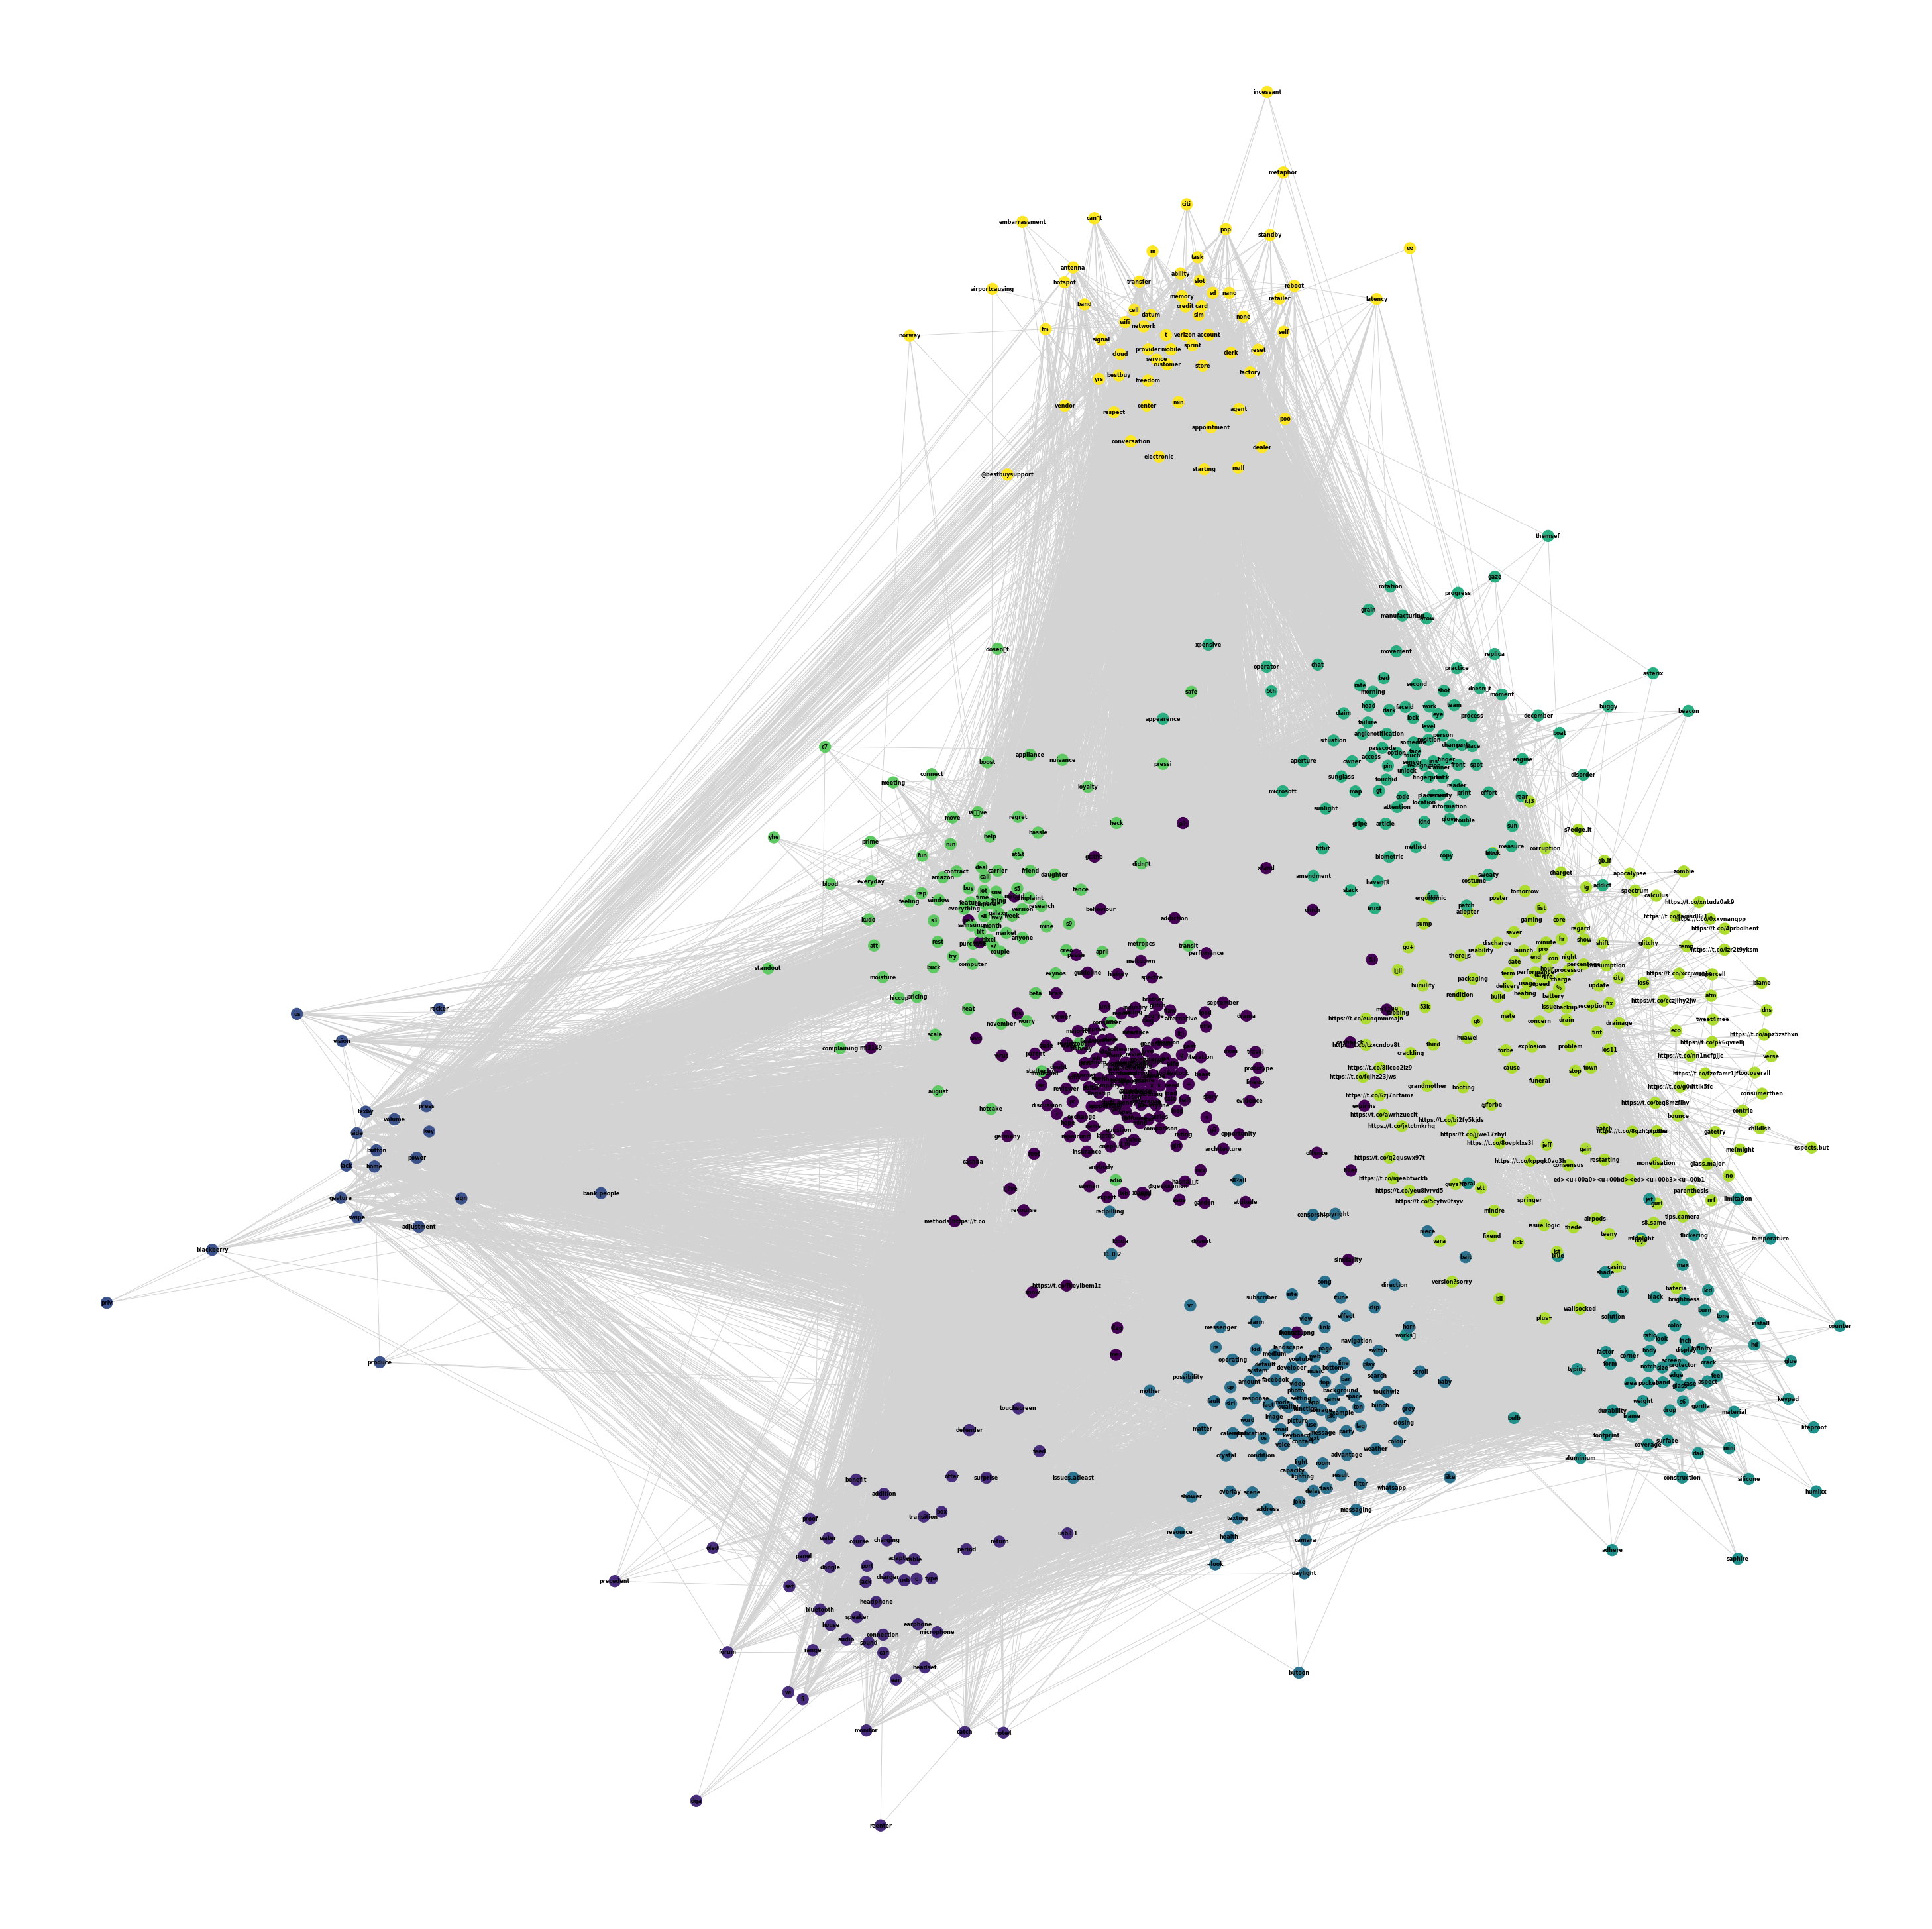

In [39]:
from community import community_louvain

#Nodes around 'problem'
matplotlib.rcParams['figure.figsize'] = (40, 40)
G=nx.ego_graph(G=graph_of_words, radius=1, n='problem')
partition = community_louvain.best_partition(G)
pos = community_layout(g=G, partition=partition)
nx.draw(G, pos, node_color=list(partition.values()), 
        labels=dict((n,n) for n,d in G.nodes(data=True)), font_color='black', font_size=8, font_weight='bold',
       edge_color='lightgray')

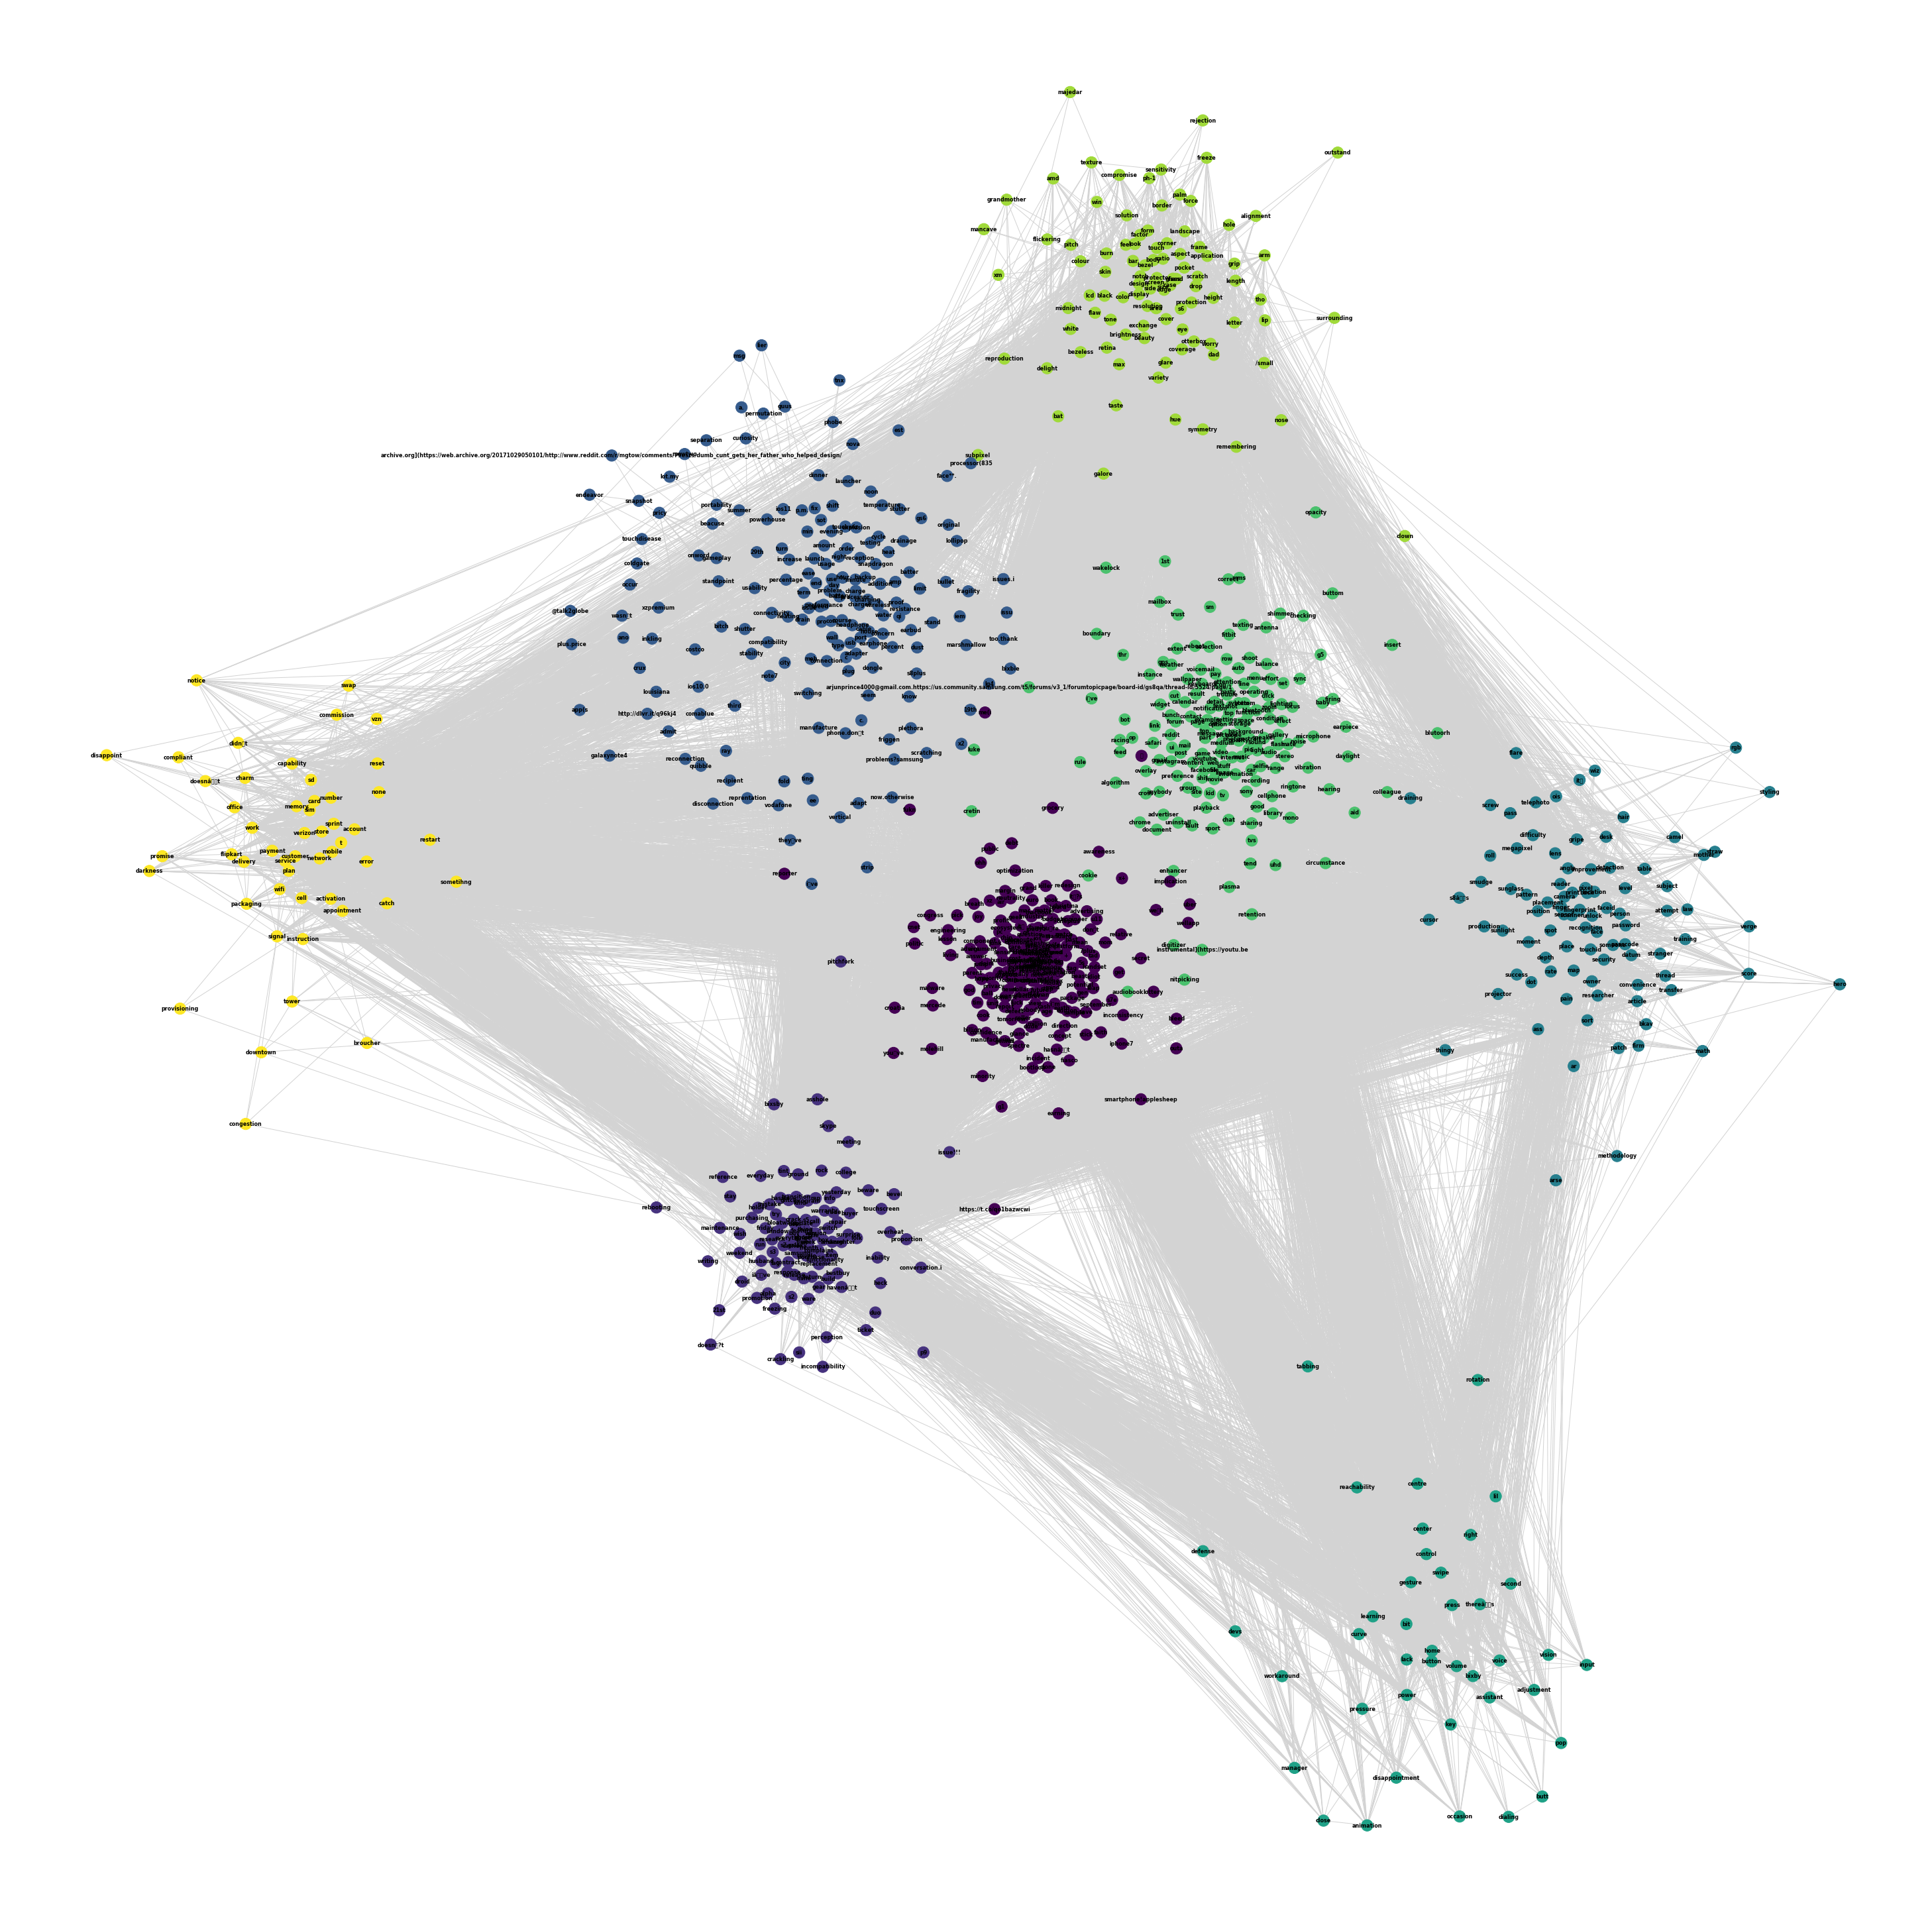

In [38]:
# Nodes around 'issue'
G=nx.ego_graph(G=graph_of_words, radius=1, n='issue')
partition = community_louvain.best_partition(G)
pos = community_layout(g=G, partition=partition)
matplotlib.rcParams['figure.figsize'] = (40, 40)
nx.draw(G, pos, node_color=list(partition.values()), 
        labels=dict((n,n) for n,d in G.nodes(data=True)), font_color='black', font_size=8, font_weight='bold',
       edge_color='lightgray')